### Transform CSV
Creating a modified CSV file with indicator variables (IVs) that represent categorical variables and splits the blood pressure data for easier analysis.

In [20]:
import pandas as pd

def clean_dry_eye_dataset(input_file, output_file):
        df = pd.read_csv(input_file)
        
        # Generate IVs for us.
        df.replace({'Y': 1, 'N': 0}, inplace=True)
        df.replace({'M': 1, 'F': 0}, inplace=True)
    
        # Split 'Blood pressure' column into 'Systolic' and 'Diastolic'
        if 'Blood pressure' in df.columns:
            # A neat Pandas trick that uses string split to split into two columns
            df[['systolic_bp', 'diastolic_bp']] = df['Blood pressure'].str.split('/', expand=True)
            # Removing extra column
            df.drop(columns=['Blood pressure'], inplace=True)
        
        # Save the modified dataset, we aren't interested in indexing.
        df.to_csv(output_file, index=False)
        print(f"Modified dataset saved to {output_file}")

input_file = "Dry_Eye_Dataset.csv"
output_file = "Dry_Eye_Dataset_mod.csv"
clean_dry_eye_dataset(input_file, output_file)

Modified dataset saved to Dry_Eye_Dataset_mod.csv


### EDA
Import database

In [2]:
import pandas as pd

df = pd.read_csv("Dry_Eye_Dataset.csv")


In [3]:
print(df.head())
print(df.describe())

  Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0      F   24             9.5              2             1         137/89   
1      M   39             9.6              2             3         108/64   
2      F   45             5.4              1             5         134/81   
3      F   45             5.4              4             5         110/90   
4      F   42             5.7              3             2          99/67   

   Heart rate  Daily steps  Physical activity  Height  ...  Smoking  \
0          67         3000                 31     161  ...        N   
1          60        12000                 74     164  ...        N   
2          95        12000                 93     179  ...        N   
3          78        19000                 32     160  ...        N   
4          72         4000                173     179  ...        N   

  Medical issue Ongoing medication Smart device before bed  \
0             Y                  Y              

In [4]:
print(df.describe(include='all'))

       Gender           Age  Sleep duration  Sleep quality  Stress level  \
count   20000  20000.000000    20000.000000   20000.000000  20000.000000   
unique      2           NaN             NaN            NaN           NaN   
top         M           NaN             NaN            NaN           NaN   
freq    10028           NaN             NaN            NaN           NaN   
mean      NaN     31.422800        6.998245       2.997250      2.993750   
std       NaN      8.103717        1.731723       1.412283      1.407235   
min       NaN     18.000000        4.000000       1.000000      1.000000   
25%       NaN     24.000000        5.500000       2.000000      2.000000   
50%       NaN     31.000000        7.000000       3.000000      3.000000   
75%       NaN     39.000000        8.500000       4.000000      4.000000   
max       NaN     45.000000       10.000000       5.000000      5.000000   

       Blood pressure    Heart rate   Daily steps  Physical activity  \
count          

#### Clean data
Assign a value of 1 to all the entries that have 'Y' and 0 to all the entries that have 'N'. Essentially, we want to convert factor variables into numerical variables. We also want to convert the gender variables to integers, assign 1 to male and 0 to females. Lastly, we would like to separate into two separate variables, we want the number before the '/' to be in a systolic blood pressure column, and the number that comes after in a diastolic blood pressure column.

In [6]:
transformed_df = df.copy()

Globally convert 'Y' and 'N' variables to numeric factors.

In [7]:
# Replace all occurrences of 'Y' with 1 and 'N' with 0 in the entire DataFrame
transformed_df = transformed_df.replace({'Y': 1, 'N': 0})

print(transformed_df.head())

  Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0      F   24             9.5              2             1         137/89   
1      M   39             9.6              2             3         108/64   
2      F   45             5.4              1             5         134/81   
3      F   45             5.4              4             5         110/90   
4      F   42             5.7              3             2          99/67   

   Heart rate  Daily steps  Physical activity  Height  ...  Smoking  \
0          67         3000                 31     161  ...        0   
1          60        12000                 74     164  ...        0   
2          95        12000                 93     179  ...        0   
3          78        19000                 32     160  ...        0   
4          72         4000                173     179  ...        0   

   Medical issue  Ongoing medication  Smart device before bed  \
0              1                   1         

In [10]:
# Convert gender variables: mapping 'M' to 1 and 'F' to 0.
transformed_df['gender_numeric'] = transformed_df['Gender'].map({'M': 1, 'F': 0})

# Split the blood pressure column into systolic and diastolic columns.
transformed_df[['systolic_bp', 'diastolic_bp']] = transformed_df['Blood pressure'].str.split('/', expand=True)

# Convert the new blood pressure columns to numeric data types.
transformed_df['systolic_bp'] = pd.to_numeric(transformed_df['systolic_bp'])
transformed_df['diastolic_bp'] = pd.to_numeric(transformed_df['diastolic_bp'])

### Principal Component Analysis

In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# We are trying to predict "Dry Eye Disease"
X = transformed_df.drop(columns=["Dry Eye Disease", "Gender", "Blood pressure"])
y = transformed_df["Dry Eye Disease"]

# Standardize the predictors, as PCA is sensitive to the scale of your variables.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA on the scaled predictors.
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA loadings (components)
pca_components = pd.DataFrame(pca.components_, columns=X.columns)
print("PCA Components (Loadings):")
print(pca_components)

# Print explained variance ratio for each component.
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# PC1 loadings sorted by highest weighted variable
pc1_loadings = pca_components.iloc[0]
print("\nFirst Principal Component Loadings (sorted):")
print(pc1_loadings.abs().sort_values(ascending=False))


PCA Components (Loadings):
         Age  Sleep duration  Sleep quality  Stress level  Heart rate  \
0   0.066200        0.082362       0.068077      0.158144    0.075822   
1   0.232373        0.199043       0.352571      0.085893   -0.421882   
2   0.077579       -0.090958       0.083335      0.008636    0.060524   
3  -0.368346        0.416523      -0.035515     -0.141459   -0.245838   
4  -0.415938       -0.119564       0.109853      0.184867   -0.033717   
5  -0.041317       -0.243027       0.043932     -0.069841    0.369736   
6   0.234328       -0.107496       0.095290      0.247676   -0.030461   
7  -0.124927       -0.274362       0.067546     -0.006957    0.138547   
8   0.004620       -0.069111      -0.177726     -0.370670    0.093860   
9  -0.097922       -0.040763       0.134400     -0.337241    0.051400   
10 -0.191050       -0.372935       0.356628     -0.118709    0.008471   
11  0.004114       -0.025821      -0.233765      0.278496   -0.180571   
12  0.171478        0.20

#### Scree plot
Step-wise scree plot, denoting that PCs are incremental in explaning variation.

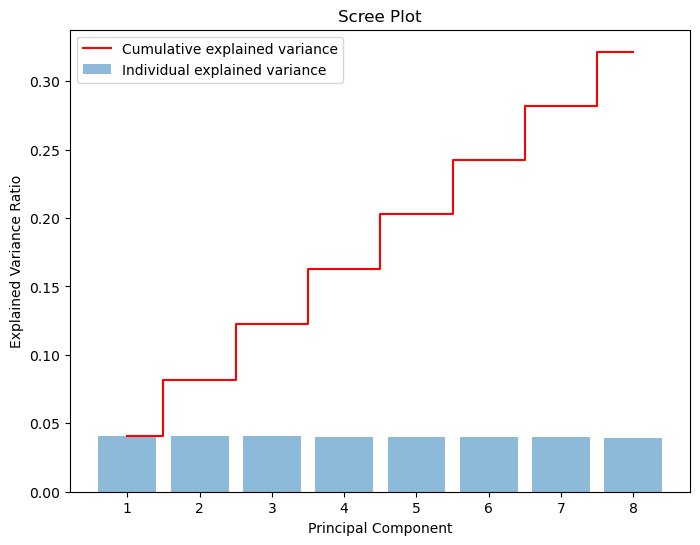

In [18]:
import matplotlib.pyplot as plt

# Number of components, take the first few
num_components = 8

# Allows us to change number of components as needed later
explained_variance = pca.explained_variance_ratio_[:num_components]

# Create a scree plot: Bar chart for individual explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, num_components + 1), explained_variance, 
        alpha=0.5, align='center', label='Individual explained variance')

# Plot cumulative explained variance
cumulative_variance = explained_variance.cumsum()
plt.step(range(1, num_components + 1), cumulative_variance, where='mid', 
         color='red', label='Cumulative explained variance')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.xticks(range(1, num_components + 1))
plt.show()

### Relaxed LASSO
Since PCA did not work well to help us narrow down the important features for further analysis, we will perform relaxed LASSO to identify the most important features. Relaxed LASSO blends LASSO estimates with the OLS estimates, giving a convex combination of the two.
More information: https://glmnet.stanford.edu/articles/relax.html

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)


In [2]:
data = pd.read_csv("Dry_Eye_Dataset_mod.csv")

# Predictor and response variables
X = data.drop(columns=["Dry Eye Disease"])
y = data["Dry Eye Disease"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split some data for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [4]:
# Fit LASSO with CV
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5, random_state=42)

In [5]:
lasso_coefs = lasso_cv.coef_
selected_features_idx = np.where(lasso_coefs != 0)[0]
print("Features selected by LASSO:")
print(np.array(X.columns)[selected_features_idx])

Features selected by LASSO:
['Gender' 'Sleep duration' 'Sleep quality' 'Stress level' 'Heart rate'
 'Daily steps' 'Height' 'Weight' 'Caffeine consumption'
 'Alcohol consumption' 'Ongoing medication' 'Smart device before bed'
 'Average screen time' 'Blue-light filter' 'Discomfort Eye-strain'
 'Redness in eye' 'Itchiness/Irritation in eye' 'diastolic_bp']


In [6]:
# Fit OLS model on features selected by LASSO and keep features not shrunk to 0
if len(selected_features_idx) > 0:
    X_train_selected = X_train[:, selected_features_idx]
    X_test_selected = X_test[:, selected_features_idx]
    
    ols = LinearRegression()
    ols.fit(X_train_selected, y_train)
    
    ols_coefs = ols.coef_
else:
    raise ValueError("No features were selected by LASSO.")

In [7]:
# Predict relaxed LASSO estimator
gamma = 0.5
relaxed_coefs = gamma * lasso_cv.coef_[selected_features_idx] + (1 - gamma) * ols_coefs

# Predict on the test set using the relaxed model:
y_pred_relaxed = gamma * lasso_cv.predict(X_test) + (1 - gamma) * ols.predict(X_test_selected)
mse_relaxed = mean_squared_error(y_test, y_pred_relaxed)
print(f"Relaxed LASSO Mean Squared Error with gamma={gamma}: {mse_relaxed:.4f}")


Relaxed LASSO Mean Squared Error with gamma=0.5: 0.2163


In [8]:
# Fine-tuning with CV
gammas = np.linspace(0, 1, 11)  # Try gamma from 0 to 1 in increments of 0.1
mse_scores = []

for g in gammas:
    y_pred = g * lasso_cv.predict(X_test) + (1 - g) * ols.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Gamma: {g:.2f}, MSE: {mse:.4f}")

# Identify the optimal gamma
optimal_gamma = gammas[np.argmin(mse_scores)]
print("Optimal gamma found:", optimal_gamma)

Gamma: 0.00, MSE: 0.2168
Gamma: 0.10, MSE: 0.2167
Gamma: 0.20, MSE: 0.2166
Gamma: 0.30, MSE: 0.2165
Gamma: 0.40, MSE: 0.2164
Gamma: 0.50, MSE: 0.2163
Gamma: 0.60, MSE: 0.2162
Gamma: 0.70, MSE: 0.2161
Gamma: 0.80, MSE: 0.2161
Gamma: 0.90, MSE: 0.2160
Gamma: 1.00, MSE: 0.2159
Optimal gamma found: 1.0


Optimal gamma of 1.0 means that standard LASSO is sufficient.

In [9]:
final_y_pred = optimal_gamma * lasso_cv.predict(X_test) + (1 - optimal_gamma) * ols.predict(X_test_selected)
final_mse = mean_squared_error(y_test, final_y_pred)
print("Final Relaxed LASSO MSE:", final_mse)

final_relaxed_coefs = optimal_gamma * lasso_cv.coef_[selected_features_idx] + (1 - optimal_gamma) * ols_coefs
selected_feature_names = np.array(X.columns)[selected_features_idx]
coef_table = pd.DataFrame({
    "Feature": selected_feature_names,
    "LASSO Coef": lasso_cv.coef_[selected_features_idx],
    "OLS Coef": ols_coefs,
    "Relaxed Coef": final_relaxed_coefs
})
print("\nCoefficient estimates for selected features:")
print(coef_table)

Final Relaxed LASSO MSE: 0.21589030154768202

Coefficient estimates for selected features:
                        Feature  LASSO Coef  OLS Coef  Relaxed Coef
0                        Gender   -0.006479 -0.008851     -0.006479
1                Sleep duration    0.001272  0.003659      0.001272
2                 Sleep quality   -0.001540 -0.004090     -0.001540
3                  Stress level    0.004808  0.007273      0.004808
4                    Heart rate   -0.003277 -0.005853     -0.003277
5                   Daily steps    0.003283  0.005713      0.003283
6                        Height   -0.002278 -0.004776     -0.002278
7                        Weight   -0.000520 -0.003181     -0.000520
8          Caffeine consumption    0.000605  0.003075      0.000605
9           Alcohol consumption    0.004591  0.007248      0.004591
10           Ongoing medication   -0.001092 -0.003412     -0.001092
11      Smart device before bed   -0.005434 -0.007973     -0.005434
12          Average scree

Backward elimination on remaining variables.

In [15]:
import pandas as pd
import statsmodels.api as sm

def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while True:
        # Add a constant for the intercept term
        X_model = sm.add_constant(X[features])
        model = sm.OLS(y, X_model).fit()
        # Exclude the intercept from p-value consideration
        pvalues = model.pvalues.iloc[1:]
        max_p = pvalues.max()
        if max_p > significance_level:
            worst_feature = pvalues.idxmax()
            print(f"Eliminating '{worst_feature}' with p-value {max_p:.4f}")
            features.remove(worst_feature)
        else:
            break
    return features, model

In [16]:
selected_feature_names = np.array(X.columns)[selected_features_idx]
X_lasso_selected = pd.DataFrame(X_scaled, columns=X.columns)[selected_feature_names]

final_features, final_model = backward_elimination(X_lasso_selected, y, significance_level=0.05)
print("Final features after backward elimination on LASSO-selected variables:")
print(final_features)
print("\nFinal model summary:")
print(final_model.summary())

Eliminating 'Ongoing medication' with p-value 0.8431
Eliminating 'Sleep duration' with p-value 0.8242
Eliminating 'Weight' with p-value 0.7903
Eliminating 'Caffeine consumption' with p-value 0.7804
Eliminating 'Blue-light filter' with p-value 0.5665
Eliminating 'Heart rate' with p-value 0.5624
Eliminating 'Stress level' with p-value 0.5584
Eliminating 'Sleep quality' with p-value 0.4329
Eliminating 'diastolic_bp' with p-value 0.4204
Eliminating 'Daily steps' with p-value 0.3520
Eliminating 'Height' with p-value 0.3384
Eliminating 'Alcohol consumption' with p-value 0.0570
Final features after backward elimination on LASSO-selected variables:
['Gender', 'Smart device before bed', 'Average screen time', 'Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye']

Final model summary:
                            OLS Regression Results                            
Dep. Variable:        Dry Eye Disease   R-squared:                       0.034
Model:                            OL